### Training a Decision Tree Classifier

In [1]:
%matplotlib inline

# import sample datasets from SciKit Learn
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
targets = iris.target

# Print out the basics of the dataset
print(features.shape)
print(features[:10])

print(targets.shape)
print(targets[:10])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150,)
[0 0 0 0 0 0 0 0 0 0]


In [2]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree instance. (Similar to Linear Regression, API, just different class)
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Call fit function as before
# features are rows of features
# targets is a row corresponding to the outcomes
model = decisiontree.fit(features, targets)

In [4]:
observation = [[5, 4, 3, 2]]
print("the prediction for {} is {}".format(observation, model.predict(observation)))
print("predicted probabilities for the three classes: {}".format(model.predict(observation)))

the prediction for [[5, 4, 3, 2]] is [1]
predicted probabilities for the three classes: [1]


#### Comparison to linear regression.

Compare to a linear regression prediction, which operates in a similar way, but predicts a continuous value.

In [5]:
from sklearn import linear_model

# ask for a linear regression model
linear_regression = linear_model.LinearRegression()

linear_regression.fit(features,targets)
linear_regression.predict([[5, 4, 3, 2]])

array([1.37108722])

### Decision Tree Regressor

Decision tree regression works similarly to decision tree classification, however instead of reducing Gini impurity or entropy, potential splits are by default measure on how much they reduce mean squared error (MSE): 

In [6]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(random_state=0)
model = decisiontree.fit(features, targets)

observation = [[0.02, 16, 13, 2]]
model.predict(observation)

array([2.])

### Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0, n_estimators=100)
model = randomforest.fit(features, targets)

#randomforest_entropy = RandomForestClassifier(criterion='entropy', random_state=0)
#model_entropy = randomforest_entropy.fit(features, target)

observation = [[ 5, 4, 3, 2]]
model.predict(observation)

array([1])

### Feature Importance

It is also possible to get a weighting of feature importance in a random forest classifier.

[0.09090795 0.02453104 0.46044474 0.42411627]
model.feature_importances_: [0.09090795 0.02453104 0.46044474 0.42411627]


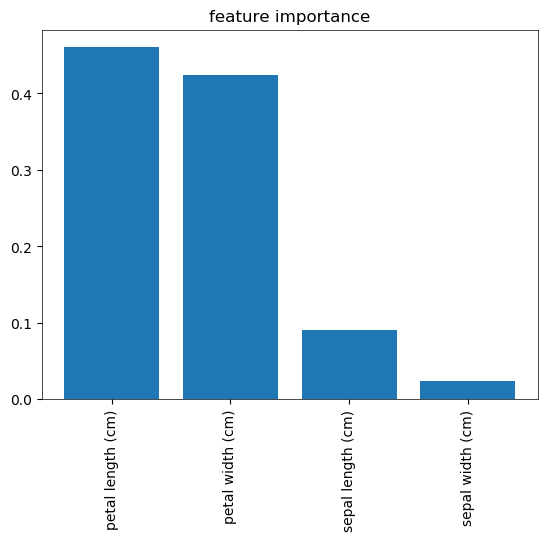

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Ask for feature importances from trained model
importances = model.feature_importances_

print(importances[:10])

# plot the relative importance of each feature
print("model.feature_importances_: {}".format(importances))

# sort the indices in order of importance
indices = np.argsort(importances)[::-1]


# plot the relative importances
names = [iris.feature_names[i] for i in indices]
plt.figure()
plt.title("feature importance")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

### Boosting

In a random forest, an ensemble (group) of randomized decision trees predicts the target vector. 

An alternative approach is called boosting. In one form of boosting called AdaBoost, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stump), each iteration giving higher priority to observations the previous model predicted incorrectly. 

More specifically in AdaBoost:

    Assign every observation, $x_p$ an initial weight value, $w_i = \frac{1}{n}$, where n is the total number of observations in the dat

    Train a "weak" model on the data

    For each observation: a. If weak model predicts $x_i$ correctly $w_i$ is increased. b. If weak model predicts $x_i$ incorrectly $w_i$ is decreased.

    Train a new weak model where observations with greater $w_i$ are given greater priority.

    Repeat steps 4 and 5 until the data is perfectly predicted or a preset number of weak models has been trained

The end result is an aggregated model where individual weak mdoels focus on more difficult (from a prediction perspective) observations.

In [11]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=0)

model = adaboost.fit(features, targets)
model.predict(observation)

array([2])